In [1]:
# Import pandas and read csv

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv("Data/creditcard_sampledata_2.csv")

In [2]:
df.head()

Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      221547 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849   
1      184524  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590   
2       91201  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793   
3       26115 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582   
4      201292 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.385675  0.352793 -1.098301  ...  0.507173  1.292565 -0.467752  1.244887   
1 -0.076217 -0.108390  0.973310  ...  0.124055  0.564916 -0.039331 -0.283904   
2 -1.633016  0.815350 -1.884692  ... -0.412088 -1.017485  0.129566  0.948048   
3  0.209454  0.770550 -0.558106  ...  0.011158  0.146017 -0.130401 -0.848815   
4  1.005246  0.132932 -1.558317  ...  0.254485  0.530692 -0.651119  0.626389   

        V25       V26       V27       V28  Amount  Class  
0  0.697707  0.059375 -0.319964 -0.017444   27.44      0  
1  0.186400  0.192932 -0.039155 -0.071314   35.95      0  
2  0.287826 -0.396592  0.042997  0.025853   28.40      0  
3  0.005698 -0.183295  0.282940  0.123856   43.20      0  
4  1.040212  0.249501 -0.146745  0.029714   10.59      0  

[5 rows x 31 columns]

In [3]:
df.shape

(7300, 31)

In [4]:
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7300 non-null   int64  
 1   V1          7300 non-null   float64
 2   V2          7300 non-null   float64
 3   V3          7300 non-null   float64
 4   V4          7300 non-null   float64
 5   V5          7300 non-null   float64
 6   V6          7300 non-null   float64
 7   V7          7300 non-null   float64
 8   V8          7300 non-null   float64
 9   V9          7300 non-null   float64
 10  V10         7300 non-null   float64
 11  V11         7300 non-null   float64
 12  V12         7300 non-null   float64
 13  V13         7300 non-null   float64
 14  V14         7300 non-null   float64
 15  V15         7300 non-null   float64
 16  V16         7300 non-null   float64
 17  V17         7300 non-null   float64
 18  V18         7300 non-null   float64
 19  V19         7300 non-null  

In [5]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

0    7000
1     300
Name: Class, dtype: int64


In [6]:
X = df.loc[df['Class'] == 0]
# X = X['Class']
X = X[['Class']]
X.head()

Class
0      0
1      0
2      0
3      0
4      0

In [7]:
# y = df.loc[df['Class'] == 1]
# y = y['Class']
# y.head()

In [8]:
def prep_data(df):
    X = df.loc[df['Class'] == 0]
    X = X[['Class']]
    y = df.loc[df['Class'] == 1]
    y = y[['Class']]
    return X, y
    
    
    

In [9]:
df['Class'].count()

7300

In [10]:
# Print the ratio of fraud cases
print(occ / df['Class'].count())

0    0.958904
1    0.041096
Name: Class, dtype: float64


### Synthetic Minority Oversampling Technique (SMOTE) using nearest neighbour

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
method = SMOTE()

features = df.drop('Class', axis=1)
labels = df['Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=8)

In [12]:
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [15]:
predicted = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1399
           1       0.48      0.85      0.62        61

    accuracy                           0.96      1460
   macro avg       0.74      0.91      0.80      1460
weighted avg       0.97      0.96      0.96      1460



In [17]:
# # Print the value_counts on the original labels y
# print(pd.value_counts(pd.Series(y)))




In [18]:
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

1    5601
0    5601
Name: Class, dtype: int64


### Exploring the traditional way to catch fraud

In [19]:
# Run a groupby command on our labels and obtain the mean for each feature
df.groupby('Class').mean()

Unnamed: 0        V1        V2        V3        V4        V5  \
Class                                                                    
0      142476.679571  0.010316  0.008078  0.014729  0.008060  0.015409   
1      117732.716667 -4.957125  3.701927 -7.118341  4.513141 -3.482910   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.006414  0.034744 -0.004843  0.008350  ...  0.000334  0.002805   
1     -1.339842 -5.743580  0.830079 -2.624878  ...  0.332810  0.738976   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.006658  0.004198  0.001145 -0.001243  0.010977  0.004371  0.001989   
1      0.069193  0.000879 -0.066388  0.001507  0.027739  0.125095  0.095441   

           Amount  
Class              
0       89.084347  
1      120.440500  

[2 rows x 30 columns]

In [20]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

In [21]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0    1
Actual Fraud            
0              6967   33
1               190  110


### Using ML classification to catch fraud

In [22]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=0)

In [23]:
# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Obtain model predictions
predicted = model.predict(X_test)

In [25]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2099
           1       0.81      0.81      0.81        91

    accuracy                           0.98      2190
   macro avg       0.90      0.90      0.90      2190
weighted avg       0.98      0.98      0.98      2190

Confusion matrix:
 [[2082   17]
 [  17   74]]


### Logistic regression combined with SMOTE

In [26]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

In [27]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

In [28]:
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline

In [29]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=0)


In [30]:
# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

In [31]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2099
           1       0.60      0.87      0.71        91

    accuracy                           0.97      2190
   macro avg       0.80      0.92      0.85      2190
weighted avg       0.98      0.97      0.97      2190

Confusion matrix:
 [[2047   52]
 [  12   79]]


In [32]:
# # Count the total number of observations from the length of y
# total_obs = len(y)
# total_obs

In [33]:
# # Count the total number of non-fraudulent observations 
# non_fraud = [i for i in y if i == 0]
# count_non_fraud = non_fraud.count(0)
# count_non_fraud

In [34]:
# # Calculate the percentage of non fraud observations in the dataset
# percentage = (float(count_non_fraud)/float(total_obs)) * 100

In [35]:
# # Print the percentage: this is our "natural accuracy" by doing nothing
# print(percentage)

### Random Forest Classifier - part 1

In [36]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=0)

In [38]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [39]:
# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [40]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.991324200913242


Random Forest prevents overfitting most of the time, by creating random subsets of the features and building smaller trees using these subsets. Afterwards, it combines the subtrees of subsamples of features, so it does not tend to overfit to your entire feature set the way "deep" Decisions Trees do.

#### Performance metrics for the RF model

In [42]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [43]:
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

In [44]:
# Predict probabilities
probs = model.predict_proba(X_test)

In [45]:
# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9610803679407776
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


In [46]:
# Import the packages
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [47]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

In [48]:
# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.80')

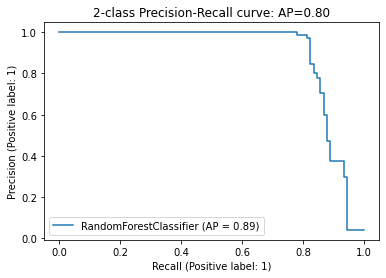

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

What's the benefit of the performance metric ROC curve (AUROC) versus Precision and Recall?

The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't.

In [50]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

In [51]:
# Fit your training model to your training set
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

In [52]:
# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [53]:
# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9604233308378138
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


#### Adjusting your Random Forest to fraud detection

In [54]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    # Fit your training model to your training set
    model.fit(X_train, y_train)
    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print(roc_auc_score(y_test, probs[:,1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))

In [55]:
def get_model_results_for_ensemble(X_train, y_train, X_test, y_test, model):
    # Fit your training model to your training set
    model.fit(X_train, y_train)
    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))

In [56]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
			
			# Change depth of model
            max_depth=10,
		
			# Change the number of samples in leaf nodes
            min_samples_leaf=10, 

			# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

0.9495049971467311
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.82      0.89        91

    accuracy                           0.99      2190
   macro avg       0.98      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  16   75]]


You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise you've manually changed the options of the model. There is a smarter way of doing it, by using GridSearchCV!

### GridSearchCV to find optimal parameters

In [57]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### Model results using GridSearchCV

In [58]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

0.9660696616389803
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.82      0.89        91

    accuracy                           0.99      2190
   macro avg       0.98      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  16   75]]


### Logistic Regression

In [59]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

0.9520127323843379
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2099
           1       0.54      0.88      0.67        91

    accuracy                           0.96      2190
   macro avg       0.77      0.92      0.82      2190
weighted avg       0.98      0.96      0.97      2190

[[2030   69]
 [  11   80]]


### Voting Classifier

In [60]:
# Import the package
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')



In [61]:
ensemble_model

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight={0: 1, 1: 15},
                                                 random_state=5)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 12},
                                                     max_depth=8,
                                                     max_features='log2',
                                                     min_samples_leaf=10,
                                                     n_estimators=30, n_jobs=-1,
                                                     random_state=5)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=5))])

In [62]:
# Get the results 
get_model_results_for_ensemble(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2090    9]
 [  13   78]]


### Adjust weights within the Voting Classifier

In [63]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results_for_ensemble(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.93      0.85      0.89        91

    accuracy                           0.99      2190
   macro avg       0.96      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2093    6]
 [  14   77]]


In [64]:
df = pd.read_csv("Data/banksim.csv")
df.head()
# df = pd.read_csv("Data/creditcard_sampledata_2.csv")

Unnamed: 0 age gender           category  amount  fraud
0      171915   3      F  es_transportation   49.71      0
1      426989   4      F          es_health   39.29      0
2      310539   3      F  es_transportation   18.76      0
3      215216   4      M  es_transportation   13.95      0
4      569244   2      M  es_transportation   49.87      0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7200 non-null   int64  
 1   age         7200 non-null   object 
 2   gender      7200 non-null   object 
 3   category    7200 non-null   object 
 4   amount      7200 non-null   float64
 5   fraud       7200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB


In [65]:
df.groupby('category').mean()

Unnamed: 0      amount     fraud
category                                                  
es_barsandrestaurants  267372.707865   43.841793  0.022472
es_contents            335906.153846   55.170000  0.000000
es_fashion             286952.226804   59.780769  0.020619
es_food                334978.976190   35.216050  0.000000
es_health              335355.176955  126.604704  0.242798
es_home                248312.583333  120.688317  0.208333
es_hotelservices       280138.548387  172.756245  0.548387
es_hyper               244440.712500   46.788180  0.125000
es_leisure             186541.307692  229.757600  1.000000
es_otherservices       241279.000000  149.648960  0.600000
es_sportsandtoys       238775.539474  157.251737  0.657895
es_tech                310473.948718  132.852862  0.179487
es_transportation      295733.881674   27.422014  0.000000
es_travel              338897.777778  231.818656  0.944444
es_wellnessandbeauty   275085.979798   66.167078  0.060606

### Customer segmentation

In [66]:
# Group by age groups and get the mean
print(df.groupby('age').mean())

        Unnamed: 0     amount     fraud
age                                    
0    327520.450000  49.468935  0.050000
1    290985.509116  35.622829  0.026648
2    296867.958851  37.228665  0.028718
3    291471.417346  37.279338  0.023283
4    306041.396403  36.197985  0.035966
5    290885.960859  37.547521  0.023990
6    299193.716561  36.700852  0.022293
U    288372.181818  39.117000  0.000000


In [67]:
# Count the values of the observations in each age group
print(df['age'].value_counts())

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64


### Using statistics to define normal behavior

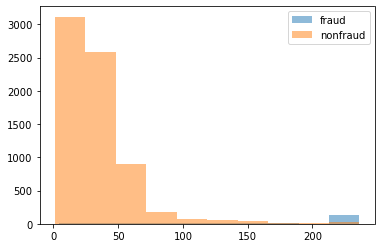

In [68]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud==1]
df_non_fraud = df.loc[df.fraud==0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

In [70]:
df_fraud = df.loc[df.fraud==1]
df['amount'].max()

236.14739999999958

In [71]:
df_non_fraud = df.loc[df.fraud==0]
df_non_fraud['amount'].max()
df_non_fraud

Unnamed: 0 age gender              category   amount  fraud
0         171915   3      F     es_transportation  49.7100      0
1         426989   4      F             es_health  39.2900      0
2         310539   3      F     es_transportation  18.7600      0
3         215216   4      M     es_transportation  13.9500      0
4         569244   2      M     es_transportation  49.8700      0
...          ...  ..    ...                   ...      ...    ...
6995      335137   4      M     es_transportation   8.0500      0
6996      219477   3      F     es_transportation   1.0998      0
6997       61529   4      F  es_wellnessandbeauty  86.5300      0
6998      318639   1      M     es_transportation  10.1800      0
6999      445066   2      F     es_transportation  45.6700      0

[7000 rows x 6 columns]

### K-Means clustering

Using elbow curve determine the number of clusters

In [77]:
# Import the packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
df = pd.read_csv("Data/banksim_adj.csv")
# Transform and scale your data
X = np.array(df).astype(np.float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Define the k-means model and fit to the data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

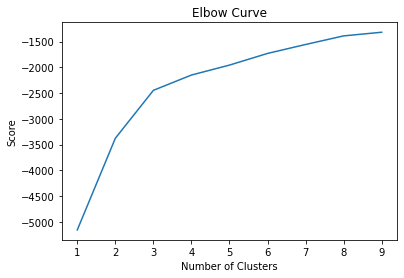

In [78]:
clust = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [83]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler
# df = pd.read_csv("Data/banksim.csv")

df = pd.read_csv("Data/banksim_adj.csv")

# Take the float values of df for X
X = df.values.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
df.head()

Unnamed: 0  age  amount  fraud  M  es_barsandrestaurants  es_contents  \
0           0    3   49.71      0  0                      0            0   
1           1    4   39.29      0  0                      0            0   
2           2    3   18.76      0  0                      0            0   
3           3    4   13.95      0  1                      0            0   
4           4    2   49.87      0  1                      0            0   

   es_fashion  es_food  es_health  es_home  es_hotelservices  es_hyper  \
0           0        0          0        0                 0         0   
1           0        0          1        0                 0         0   
2           0        0          0        0                 0         0   
3           0        0          0        0                 0         0   
4           0        0          0        0                 0         0   

   es_leisure  es_otherservices  es_sportsandtoys  es_tech  es_transportation  \
0           0                 0                 0        0                  1   
1           0                 0                 0        0                  0   
2           0                 0                 0        0                  1   
3           0                 0                 0        0                  1   
4           0                 0                 0        0                  1   

   es_travel  
0          0  
1          0  
2          0  
3          0  
4          0

In [85]:
features = df.drop('fraud', axis=1)
labels = df['fraud']

In [79]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

C:\Users\plaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(random_state=0)

### Elbow method : checking what the right amount of clusters should be

C:\Users\plaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\plaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\plaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\p

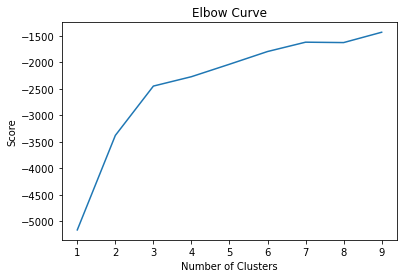

In [80]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Detecting outliers

In [86]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

C:\Users\plaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [87]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

0.934936176504411


In [94]:
from sklearn.metrics import plot_confusion_matrix
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)
print(km_cm)
# # Plot the confusion matrix in a figure to visualize results 
# plot_confusion_matrix(km_cm)

0.934936176504411
[[2043   56]
 [   6   52]]


If you were to decrease the percentile used as a cutoff point in the previous exercise to 93% instead of 95%, what would that do to your prediction results?

By lowering the threshold for cases flagged as fraud, you flag more cases overall but thereby also get more false positives.

### DBSCAN

In [92]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score
# Initialize and fit the DBSCAN model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBSCAN
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 26
Homogeneity: 0.922
Silhouette Coefficient: 0.564


### Assessing smallest clusters

In [95]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  105 2714   46  174  119  112   79   52   74   43   24   45   42
   11   19   16   13   10   15   35   10   40   19   11]


In [96]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 18 24]


In [97]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[10 10 11]


### Checking results

In [98]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6902  87
1               190  10


### Using text data

#### Word search with dataframes

In [100]:
# Find all cleaned emails that contain 'sell enron stock'
df = pd.read_csv("Data/enron_emails_clean.csv")
mask = df['clean_content'].str.contains('sell enron stock', na=False)

In [101]:
# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)

# Select the data from df that contain the searched for words 
print(df.loc[mask])

                                       Message-ID                        From  \
154  <6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                             To                 Date  \
154  ('sarah.palmer@enron.com')  2002-02-01 14:53:35   

                                               content  \
154  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...  


### Using list of terms

In [102]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
print(filtered_emails)

                                         Message-ID  \
0      <8345058.1075840404046.JavaMail.evans@thyme>   
1      <1512159.1075863666797.JavaMail.evans@thyme>   
2     <26118676.1075862176383.JavaMail.evans@thyme>   
3     <10369289.1075860831062.JavaMail.evans@thyme>   
4     <26728895.1075860815046.JavaMail.evans@thyme>   
...                                             ...   
1151  <15875618.1075860830584.JavaMail.evans@thyme>   
1450  <30798399.1075841348382.JavaMail.evans@thyme>   
1473    <957052.1075861359136.JavaMail.evans@thyme>   
1557  <18936682.1075861158419.JavaMail.evans@thyme>   
1621   <5472336.1075841501893.JavaMail.evans@thyme>   

                                   From                                 To  \
0       ('advdfeedback@investools.com')    ('advdfeedback@investools.com')   
1         ('richard.sanders@enron.com')      ('richard.sanders@enron.com')   
2                 ('m..love@enron.com')              ('m..love@enron.com')   
3          ('leslie.milosev

### Creating a flag

In [103]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


### Removing stopwords

In [104]:
# Import nltk packages and string 
from nltk.corpus import stopwords 
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

### Cleaning text data

In [117]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
	# Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
	# Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude)
	# Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    return normalized

In [119]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

# Clean the emails in df and print results
df['clean_content'] = df['clean_content'].astype('str') 
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
print(text_clean[0])

['investools', 'advisory', 'free', 'digest', 'trusted', 'investment', 'advice', 'unsubscribe', 'free', 'newsletter', 'please', 'see', 'issue', 'fried', 'sell', 'stock', 'gain', 'month', 'km', 'rowe', 'january', 'index', 'confirms', 'bull', 'market', 'aloy', 'small', 'cap', 'advisor', 'earns', 'lbix', 'compounding', 'return', 'pine', 'tree', 'pcl', 'undervalued', 'high', 'yield', 'bank', 'put', 'customer', 'first', 'aso', 'word', 'sponsor', 'top', 'wall', 'street', 'watcher', 'ben', 'zacks', 'year', 'year', 'gain', 'moving', 'best', 'brightest', 'wall', 'street', 'big', 'money', 'machine', 'earned', 'ben', 'zacks', 'five', 'year', 'average', 'annual', 'gain', 'start', 'outperforming', 'long', 'term', 'get', 'zacks', 'latest', 'stock', 'buylist', 'free', 'day', 'trial', 'investools', 'c', 'go', 'zaks', 'mtxtu', 'zakstb', 'investools', 'advisory', 'john', 'brobst', 'investools', 'fried', 'sell', 'stock', 'lock', 'month', 'km', 'david', 'fried', 'know', 'stock', 'undervalued', 'company', '

### LDA topic model

#### Create dictionary and corpus

In [121]:
# ! pip install gensim

You should consider upgrading via the 'c:\users\plaba\anaconda3\python.exe -m pip install --upgrade pip' command.


In [122]:
# Import the packages

import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(dictionary)
print(corpus)

C:\Users\plaba\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Dictionary(33981 unique tokens: ['account', 'accurate', 'acquiring', 'acre', 'address']...)
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (7, 2), (8, 4), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 5), (15, 3), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 3), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 1), (57, 4), (58, 9), (59, 5), (60, 1), (61, 8), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 12), (82, 2), (83, 2), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 1), (98, 2), (99, 2), (100, 1), (101,

### LDA model

In [123]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.013*"message" + 0.011*"pm" + 0.010*"original" + 0.006*"schedule" + 0.006*"outage"')
(1, '0.020*"enron" + 0.009*"company" + 0.005*"said" + 0.005*"market" + 0.005*"stock"')
(2, '0.011*"enron" + 0.010*"bakernet" + 0.009*"employee" + 0.007*"company" + 0.006*"amazon"')
(3, '0.033*"image" + 0.032*"td" + 0.023*"net" + 0.022*"money" + 0.021*"tr"')
(4, '0.052*"enron" + 0.013*"hou" + 0.009*"corp" + 0.009*"e" + 0.009*"pm"')


In [127]:
### Thank You!